<a href="https://colab.research.google.com/github/alvaroguarda/cats-dogs/blob/main/Metricas_Avalia%C3%A7%C3%A3o_Aprendizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [4]:
# Load dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Normalize dataset (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
# Convert labels in one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
# Build the neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Transform 2D image in a vector
    Dense(128, activation='relu'),  # Hidden Layer with 128 neurons
    Dense(10, activation='softmax')  # Output Layer with 10 classes (0 to 9)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Train the neural network
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8732 - loss: 0.4472 - val_accuracy: 0.9647 - val_loss: 0.1291
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9605 - loss: 0.1329 - val_accuracy: 0.9700 - val_loss: 0.1046
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9745 - loss: 0.0863 - val_accuracy: 0.9740 - val_loss: 0.0893
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9822 - loss: 0.0604 - val_accuracy: 0.9797 - val_loss: 0.0734
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9867 - loss: 0.0431 - val_accuracy: 0.9775 - val_loss: 0.0803


In [10]:
con_matrix = tf.math.confusion_matrix(tf.argmax(y_test, axis=1), tf.argmax(model.predict(x_test), axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step


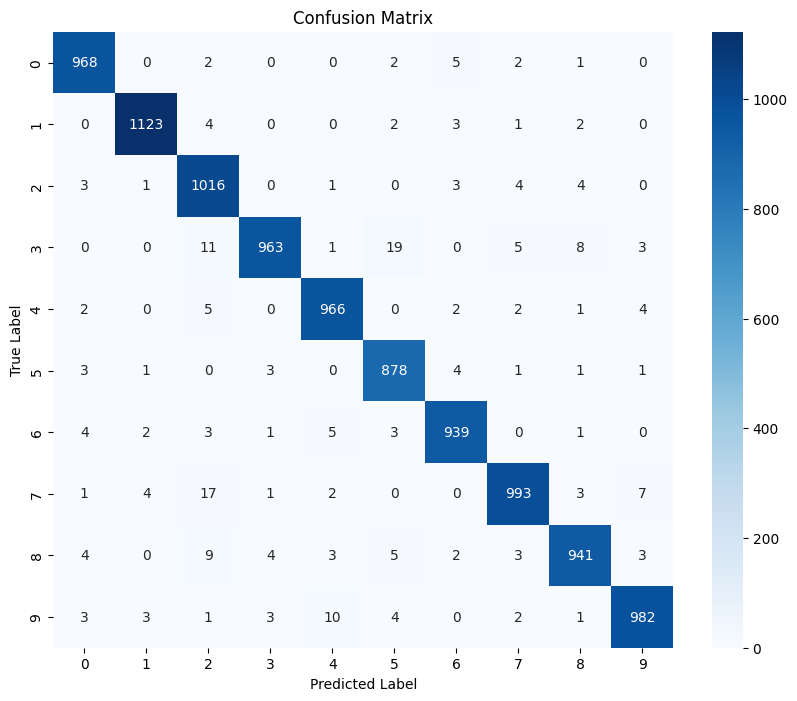

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# Determine the number of classes
num_classes = con_matrix.shape[0]

# Dictionaries to store metrics for each class
true_negatives_per_class = {}
specificity_per_class = {}
precision_per_class = {}
sensitivity_per_class = {}
accuracy_per_class = {}
fscore_per_class = {}

# Iterate through each class
for i in range(num_classes):
    # Calculate the sum of all elements in the confusion matrix
    total_elements = np.sum(con_matrix)

    # True Positives for class i are the diagonal elements
    true_positives_i = con_matrix[i, i]

    # False Positives for class i are the sum of the current column (i) excluding the element at (i,i)
    false_positives_i = np.sum(con_matrix[:, i]) - true_positives_i

    # False Negatives for class i are the sum of the current row (i) excluding the element at (i,i)
    false_negatives_i = np.sum(con_matrix[i, :]) - true_positives_i

    # True Negatives for class i are the sum of all elements excluding the row 'i' and the column 'i'.
    true_negatives_i = total_elements - true_positives_i - false_positives_i - false_negatives_i


    # Specificity for class i = True Negatives / (True Negatives + False Positives)
    # Avoid division by zero
    specificity_i = true_negatives_i / (true_negatives_i + false_positives_i) if (true_negatives_i + false_positives_i) > 0 else 0

    # Precision for class i = True Positives / (True Positives + False Positives)
    # Avoid division by zero
    precision_i = true_positives_i / (true_positives_i + false_positives_i) if (true_positives_i + false_positives_i) > 0 else 0

    # Sensitivity for class i = True Positives / (True Positives + False Negatives)
    # Avoid division by zero
    sensitivity_i = true_positives_i / (true_positives_i + false_negatives_i) if (true_positives_i + false_negatives_i) > 0 else 0

    # Accuracy for class i = (True Positives + True Negatives) / Total Elements
    accuracy_i = (true_positives_i + true_negatives_i) / total_elements

    # F-score for class i = 2 * (precision_i * sensitivity_i) / (precision_i + sensitivity_i) if (precision_i + sensitivity_i) > 0 else 0
    # Corrected F-score calculation
    fscore_i = 2 * (precision_i * sensitivity_i) / (precision_i + sensitivity_i) if (precision_i + sensitivity_i) > 0 else 0


    # Store the specificity, precision, and recall results
    specificity_per_class[f'Class {i}'] = specificity_i
    precision_per_class[f'Class {i}'] = precision_i
    sensitivity_per_class[f'Class {i}'] = sensitivity_i
    accuracy_per_class[f'Class {i}'] = accuracy_i
    fscore_per_class[f'Class {i}'] = fscore_i


print("Metrics for each class")
print("-------------------------")
print()

print("\nAccuracy per Class:")
for class_label, accuracy_value in accuracy_per_class.items():
    print(f'{class_label}: {accuracy_value:.4f}')

print("\nSpecificity per Class:")
for class_label, specificity_value in specificity_per_class.items():
    print(f'{class_label}: {specificity_value:.4f}')

print("\nPrecision per Class:")
for class_label, precision_value in precision_per_class.items():
    print(f'{class_label}: {precision_value:.4f}')

print("\nSensitivity per Class:")
for class_label, sensitivity_value in sensitivity_per_class.items():
    print(f'{class_label}: {sensitivity_value:.4f}')

print("\nF-score per Class:")
for class_label, fscore_value in fscore_per_class.items():
    print(f'{class_label}: {fscore_value:.4f}')

Metrics for each class
-------------------------


Accuracy per Class:
Class 0: 0.9968
Class 1: 0.9977
Class 2: 0.9932
Class 3: 0.9941
Class 4: 0.9962
Class 5: 0.9951
Class 6: 0.9962
Class 7: 0.9945
Class 8: 0.9945
Class 9: 0.9955

Specificity per Class:
Class 0: 0.9978
Class 1: 0.9988
Class 2: 0.9942
Class 3: 0.9987
Class 4: 0.9976
Class 5: 0.9962
Class 6: 0.9979
Class 7: 0.9978
Class 8: 0.9976
Class 9: 0.9980

Precision per Class:
Class 0: 0.9798
Class 1: 0.9903
Class 2: 0.9513
Class 3: 0.9877
Class 4: 0.9777
Class 5: 0.9617
Class 6: 0.9802
Class 7: 0.9803
Class 8: 0.9772
Class 9: 0.9820

Sensitivity per Class:
Class 0: 0.9878
Class 1: 0.9894
Class 2: 0.9845
Class 3: 0.9535
Class 4: 0.9837
Class 5: 0.9843
Class 6: 0.9802
Class 7: 0.9660
Class 8: 0.9661
Class 9: 0.9732

F-score per Class:
Class 0: 0.9837
Class 1: 0.9899
Class 2: 0.9676
Class 3: 0.9703
Class 4: 0.9807
Class 5: 0.9729
Class 6: 0.9802
Class 7: 0.9731
Class 8: 0.9716
Class 9: 0.9776
